In [1]:
'''Extra Trees Classifier '''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier


In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Split the data into a training set and a test set
x, y = make_moons(n_samples=1000, noise=0.25)
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train.shape

(750, 2)

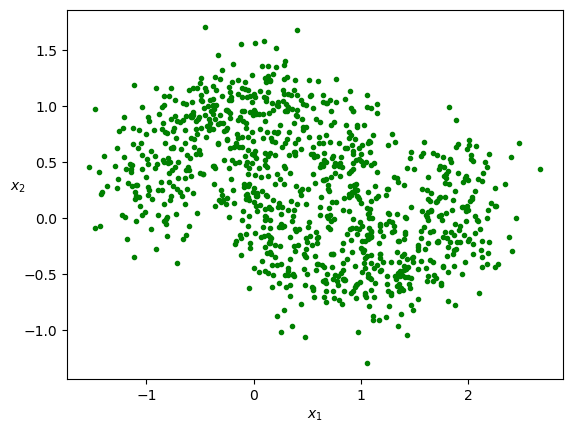

In [4]:
plt.plot(x[:,0],x[:,1],'.g')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$",rotation=0)
plt.show()

In [5]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=450,max_samples=90,
                               n_jobs=-1,oob_score=True)
bagging_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=90,
                  n_estimators=450, n_jobs=-1, oob_score=True)

In [6]:
# Now plot to compare the bagging clf to the tree clf:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [8]:
etc_clf = ExtraTreesClassifier(
    n_estimators=500,n_jobs=-1
)
etc_clf.fit(x_train,y_train)

ExtraTreesClassifier(n_estimators=500, n_jobs=-1)

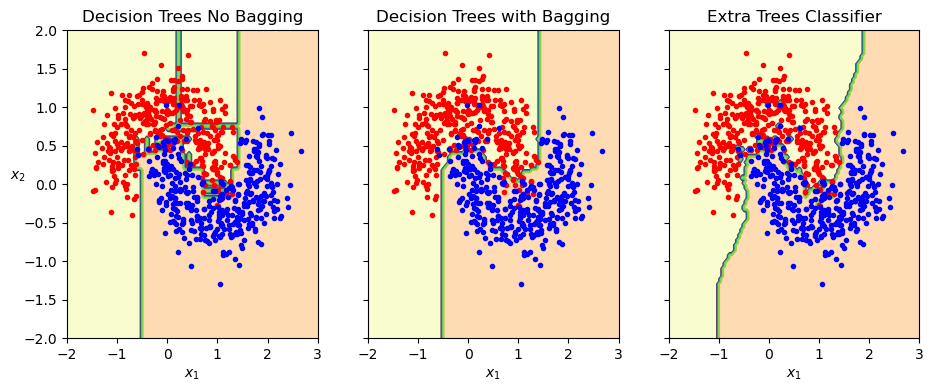

In [16]:
def decision_boundary_plot(clf,x,y,alpha=1.0):
    axes=[-2, 3, -2, 2]
    x1,x2 = np.meshgrid(np.linspace(axes[0],
                                   axes[1],120),
    np.linspace(axes[2],axes[3],120))
    x_topredict = np.c_[x1.ravel(),x2.ravel()]
    y_predicted = clf.predict(x_topredict).reshape(x1.shape)
    plt.contourf(x1,x2,y_predicted,alpha=0.3 * alpha,cmap='Wistia')
    plt.contour(x1,x2,y_predicted,alpha=0.8 * alpha)
    for idx,style in (zip((0,1),('r.','b.'))):
        plt.plot(x[:,0][y==idx],x[:,1][y==idx],style)
fig, ax = plt.subplots(ncols=3, figsize=(11, 4), sharey=True)
plt.sca(ax[0])
decision_boundary_plot(dtree_clf,x_train,y_train)
plt.title("Decision Trees No Bagging")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$", rotation=0)
plt.sca(ax[1])
decision_boundary_plot(bagging_clf,x_train,y_train)
plt.title("Decision Trees with Bagging")
plt.xlabel(r"$x_1$")
plt.sca(ax[2])
decision_boundary_plot(etc_clf,x_train,y_train)
plt.xlabel(r"$x_1$")
plt.title("Extra Trees Classifier")
plt.show()

In [ ]:
'''Conclusion
When growing a tree in a random forest, at each node only a random subset 
of features is considered for splitting. To make trees even more random 
we can use random thresholds for each feature rather than searching for
the best possible thresholds as regular decision trees do. To do this
set splitter="random" when creating a DecisionTreeClassifier. Or simply
we use Extra Trees Classifier which is just that'''